In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [4]:
df = pd.read_csv('Simulated_WAWQI_Data_with_Salinity_Temp.csv',   encoding='iso-8859-1')
df.columns

Index(['Sample Serial No ', 'pH (pH)', 'TDS (ppmTDS)', 'Salinity (PSU)',
       'Temperature', 'Total Iron (mg/L)', 'Chloride (mg/L)',
       'Turbidity (NTU)', 'Total Hardness (mg/L)', 'Mg Hardness (mg/L)',
       'Ca Hardness (mg/L)', 'TABC (CFU)', 'TC (CFU)', 'FC (CFU)', 'E.Coli',
       'Simulated WQI', 'Temperature (°C)'],
      dtype='object')

In [5]:
df.columns = [c.strip() for c in df.columns]
df.columns

Index(['Sample Serial No', 'pH (pH)', 'TDS (ppmTDS)', 'Salinity (PSU)',
       'Temperature', 'Total Iron (mg/L)', 'Chloride (mg/L)',
       'Turbidity (NTU)', 'Total Hardness (mg/L)', 'Mg Hardness (mg/L)',
       'Ca Hardness (mg/L)', 'TABC (CFU)', 'TC (CFU)', 'FC (CFU)', 'E.Coli',
       'Simulated WQI', 'Temperature (°C)'],
      dtype='object')

In [6]:
df.head()

,Sample Serial No,pH (pH),TDS (ppmTDS),Salinity (PSU),Temperature,Total Iron (mg/L),Chloride (mg/L),Turbidity (NTU),Total Hardness (mg/L),Mg Hardness (mg/L),Ca Hardness (mg/L),TABC (CFU),TC (CFU),FC (CFU),E.Coli,Simulated WQI,Temperature (°C)
0,22.01.1039,7.2,17,0.54,NaN,0.011,1.99,0.08,8,2,6,0,0,0,0,129.37,24.9
1,22.01.1049,6.9,100,0.23,NaN,0.015,17.99,0.22,52,18,34,0,0,0,0,29.48,31.4
2,22.01.1050,6.8,101,0.43,NaN,0.025,4.99,0.83,40,12,28,0,0,0,0,89.68,26.3
3,22.01.1051,6.9,130,0.72,NaN,0.015,13.99,0.15,56,20,36,320,220,54,32,49.66,26.1
4,22.01.1052,7.1,19,0.48,NaN,0.014,7.99,0.27,8,2,6,0,0,0,0,32.04,25.3


In [7]:
standards = {
    'pH (pH)': 8.5,
    'Conductivity (?S/cm)': 2500,
    'TDS (ppmTDS)': 1000,
    'Salinity (PSU)': 0.5,
    'Temperature': 25,
    'Total Iron (mg/L)': 0.3,
    'Chloride (mg/L)': 250,
    'Turbidity (NTU)': 5,
    'Total Hardness (mg/L)': 300,
    'Mg Hardness (mg/L)': 100,
    'Ca Hardness (mg/L)': 200,
    'TABC (CFU)': 500,
    'TC (CFU)': 1,
    'FC (CFU)': 1,
    'E.Coli': 1
}

print(standards)


for col in standards:
    # print(col)
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

       

{'pH (pH)': 8.5, 'Conductivity (?S/cm)': 2500, 'TDS (ppmTDS)': 1000, 'Salinity (PSU)': 0.5, 'Temperature': 25, 'Total Iron (mg/L)': 0.3, 'Chloride (mg/L)': 250, 'Turbidity (NTU)': 5, 'Total Hardness (mg/L)': 300, 'Mg Hardness (mg/L)': 100, 'Ca Hardness (mg/L)': 200, 'TABC (CFU)': 500, 'TC (CFU)': 1, 'FC (CFU)': 1, 'E.Coli': 1}


In [8]:
K_denominator = sum([1/standards[col] for col in standards])
print(K_denominator)

8.716713725490195


In [9]:
K = 1 /K_denominator
K

0.11472213399365296

In [10]:
weights = {col: K/standards[col] for col in standards}
weights

{'pH (pH)': 0.013496721646312113,
 'Conductivity (?S/cm)': 4.588885359746118e-05,
 'TDS (ppmTDS)': 0.00011472213399365296,
 'Salinity (PSU)': 0.2294442679873059,
 'Temperature': 0.004588885359746118,
 'Total Iron (mg/L)': 0.3824071133121765,
 'Chloride (mg/L)': 0.0004588885359746118,
 'Turbidity (NTU)': 0.022944426798730592,
 'Total Hardness (mg/L)': 0.0003824071133121765,
 'Mg Hardness (mg/L)': 0.0011472213399365296,
 'Ca Hardness (mg/L)': 0.0005736106699682648,
 'TABC (CFU)': 0.0002294442679873059,
 'TC (CFU)': 0.11472213399365296,
 'FC (CFU)': 0.11472213399365296,
 'E.Coli': 0.11472213399365296}

In [11]:
def compute_qi(value, col):
    if pd.isna(value):
        return np.nan
    Vi = value
    Si = standards[col]
    V0 =  7.0 if col == 'pH (pH)' else 0.0
    Qi = (Vi-V0) / (Si - V0) * 100
    if Qi < 0:
        Qi = 0
    return Qi
compute_qi(10, 'pH (pH)')

200.0

In [12]:
np.nan

nan

In [13]:
np.nan == np.nan

False

In [14]:
wawai_vals = []
for _, row in df.iterrows():
    print(_, row)
    WiQi_sum = 0
    Wi_sum = 0
    for col in standards:
        if col in df.columns:
            qi = compute_qi(row[col], col)
            wi = weights[col]
            if not np.isnan(qi):
                WiQi_sum += wi * qi
                Wi_sum += wi
    wawai_vals.append(WiQi_sum/ Wi_sum if Wi_sum != 0 else np.nan)
wawai_vals


0 Sample Serial No         22.01.1039
pH (pH)                         7.2
TDS (ppmTDS)                     17
Salinity (PSU)                 0.54
Temperature                     NaN
Total Iron (mg/L)             0.011
Chloride (mg/L)                1.99
Turbidity (NTU)                0.08
Total Hardness (mg/L)             8
Mg Hardness (mg/L)                2
Ca Hardness (mg/L)                6
TABC (CFU)                        0
TC (CFU)                        0.0
FC (CFU)                        0.0
E.Coli                          0.0
Simulated WQI                129.37
Temperature (°C)               24.9
Name: 0, dtype: object
1 Sample Serial No         22.01.1049
pH (pH)                         6.9
TDS (ppmTDS)                    100
Salinity (PSU)                 0.23
Temperature                     NaN
Total Iron (mg/L)             0.015
Chloride (mg/L)               17.99
Turbidity (NTU)                0.22
Total Hardness (mg/L)            52
Mg Hardness (mg/L)               18
C

[26.527351343451784,
 12.667618060138187,
 23.437408173104448,
 3562.0867629637,
 24.143714577137366,
 46.2769118651282,
 21.837290882848354,
 38.17540358695751,
 25.667172628356372,
 41.93716952472211,
 33.07947665494518,
 13.95525655605073,
 935.9306980706243,
 15.73664672807644,
 1943.9446424763987,
 8.759415802620914,
 817.4822248025577,
 552.3993169311251,
 668.296179103803,
 927.3575451849978,
 27.796790263628115,
 1473.4556148299478,
 38.23074198855573,
 21.112743938120165,
 15.055678409251843,
 16.84244216241951,
 15.892191009102989,
 16.802614939284865,
 898.5123689173058,
 39.096239519207884,
 34.81970454538445,
 7.92940940537106,
 16.2179770864755,
 1232.223199753517,
 24.775758169639225,
 24.12908312617328,
 37.43534470830359,
 18.032037644308325,
 36.83319190102118,
 42.17789291497414,
 9.932846048504251,
 34.70043002811351,
 27.15196188255004,
 23.827240886561242,
 22.240350543922467,
 35.55664238678178,
 29.162437259882655,
 1015.360008397892,
 415.0307173191832,
 28.568

In [15]:
df


,Sample Serial No,pH (pH),TDS (ppmTDS),Salinity (PSU),Temperature,Total Iron (mg/L),Chloride (mg/L),Turbidity (NTU),Total Hardness (mg/L),Mg Hardness (mg/L),Ca Hardness (mg/L),TABC (CFU),TC (CFU),FC (CFU),E.Coli,Simulated WQI,Temperature (°C)
0,22.01.1039,7.2,17,0.54,NaN,0.0110,1.99,0.08,8,2,6,0,0.0,0.0,0.0,129.37,24.9
1,22.01.1049,6.9,100,0.23,NaN,0.0150,17.99,0.22,52,18,34,0,0.0,0.0,0.0,29.48,31.4
2,22.01.1050,6.8,101,0.43,NaN,0.0250,4.99,0.83,40,12,28,0,0.0,0.0,0.0,89.68,26.3
3,22.01.1051,6.9,130,0.72,NaN,0.0150,13.99,0.15,56,20,36,320,220.0,54.0,32.0,49.66,26.1
4,22.01.1052,7.1,19,0.48,NaN,0.0140,7.99,0.27,8,2,6,0,0.0,0.0,0.0,32.04,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,23.08.1008,6.7,136,0.77,NaN,0.0300,31.99,0.96,46,16,30,0,0.0,0.0,0.0,7.79,28.3
294,23.08.1011,7.1,29,0.83,NaN,0.7546,16.99,NaN,6,2,4,0,0.0,0.0,0.0,99.76,25.6
295,23.08.363,6.5,560,0.20,NaN,0.0180,238.92,NaN,152,52,100,110,112.0,18.0,14.0,59.38,28.2
296,23.09.501,6.6,122,0.29,NaN,0.0140,22.99,0.02,78,26,52,0,0.0,0.0,0.0,33.54,27.9


In [16]:
# Insert new WAWQI col and its series values are wawai_values
df['WAWQI'] = wawai_vals


In [17]:
df['WAWQI']

0        26.527351
1        12.667618
2        23.437408
3      3562.086763
4        24.143715
          ...     
293      39.823851
294     138.184540
295    1710.816946
296      15.232414
297      12.035470
Name: WAWQI, Length: 298, dtype: float64

In [18]:
def classify_wawqi(val):
    if pd.isna(val):
        return 'No data'
    if val <= 25:
        return 'Excellent'
    elif val <= 50:
        return 'Good'
    elif val <= 75:
        return 'Poor'
    elif val <= 100:
        return 'Very poor'
    else:
        return 'Unsuitable'

classify_wawqi(26)
classify_wawqi(51)
classify_wawqi(76)
classify_wawqi(101)

df['WAWQI'].apply(classify_wawqi)

0            Good
1       Excellent
2       Excellent
3      Unsuitable
4       Excellent
          ...    
293          Good
294    Unsuitable
295    Unsuitable
296     Excellent
297     Excellent
Name: WAWQI, Length: 298, dtype: object

In [19]:
df['Quality Status'] = df['WAWQI'].apply(classify_wawqi)

In [20]:
df['Quality Status']

0            Good
1       Excellent
2       Excellent
3      Unsuitable
4       Excellent
          ...    
293          Good
294    Unsuitable
295    Unsuitable
296     Excellent
297     Excellent
Name: Quality Status, Length: 298, dtype: object

In [21]:
df



,Sample Serial No,pH (pH),TDS (ppmTDS),Salinity (PSU),Temperature,Total Iron (mg/L),Chloride (mg/L),Turbidity (NTU),Total Hardness (mg/L),Mg Hardness (mg/L),Ca Hardness (mg/L),TABC (CFU),TC (CFU),FC (CFU),E.Coli,Simulated WQI,Temperature (°C),WAWQI,Quality Status
0,22.01.1039,7.2,17,0.54,NaN,0.0110,1.99,0.08,8,2,6,0,0.0,0.0,0.0,129.37,24.9,26.527351,Good
1,22.01.1049,6.9,100,0.23,NaN,0.0150,17.99,0.22,52,18,34,0,0.0,0.0,0.0,29.48,31.4,12.667618,Excellent
2,22.01.1050,6.8,101,0.43,NaN,0.0250,4.99,0.83,40,12,28,0,0.0,0.0,0.0,89.68,26.3,23.437408,Excellent
3,22.01.1051,6.9,130,0.72,NaN,0.0150,13.99,0.15,56,20,36,320,220.0,54.0,32.0,49.66,26.1,3562.086763,Unsuitable
4,22.01.1052,7.1,19,0.48,NaN,0.0140,7.99,0.27,8,2,6,0,0.0,0.0,0.0,32.04,25.3,24.143715,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,23.08.1008,6.7,136,0.77,NaN,0.0300,31.99,0.96,46,16,30,0,0.0,0.0,0.0,7.79,28.3,39.823851,Good
294,23.08.1011,7.1,29,0.83,NaN,0.7546,16.99,NaN,6,2,4,0,0.0,0.0,0.0,99.76,25.6,138.184540,Unsuitable
295,23.08.363,6.5,560,0.20,NaN,0.0180,238.92,NaN,152,52,100,110,112.0,18.0,14.0,59.38,28.2,1710.816946,Unsuitable
296,23.09.501,6.6,122,0.29,NaN,0.0140,22.99,0.02,78,26,52,0,0.0,0.0,0.0,33.54,27.9,15.232414,Excellent


In [22]:
df

,Sample Serial No,pH (pH),TDS (ppmTDS),Salinity (PSU),Temperature,Total Iron (mg/L),Chloride (mg/L),Turbidity (NTU),Total Hardness (mg/L),Mg Hardness (mg/L),Ca Hardness (mg/L),TABC (CFU),TC (CFU),FC (CFU),E.Coli,Simulated WQI,Temperature (°C),WAWQI,Quality Status
0,22.01.1039,7.2,17,0.54,NaN,0.0110,1.99,0.08,8,2,6,0,0.0,0.0,0.0,129.37,24.9,26.527351,Good
1,22.01.1049,6.9,100,0.23,NaN,0.0150,17.99,0.22,52,18,34,0,0.0,0.0,0.0,29.48,31.4,12.667618,Excellent
2,22.01.1050,6.8,101,0.43,NaN,0.0250,4.99,0.83,40,12,28,0,0.0,0.0,0.0,89.68,26.3,23.437408,Excellent
3,22.01.1051,6.9,130,0.72,NaN,0.0150,13.99,0.15,56,20,36,320,220.0,54.0,32.0,49.66,26.1,3562.086763,Unsuitable
4,22.01.1052,7.1,19,0.48,NaN,0.0140,7.99,0.27,8,2,6,0,0.0,0.0,0.0,32.04,25.3,24.143715,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,23.08.1008,6.7,136,0.77,NaN,0.0300,31.99,0.96,46,16,30,0,0.0,0.0,0.0,7.79,28.3,39.823851,Good
294,23.08.1011,7.1,29,0.83,NaN,0.7546,16.99,NaN,6,2,4,0,0.0,0.0,0.0,99.76,25.6,138.184540,Unsuitable
295,23.08.363,6.5,560,0.20,NaN,0.0180,238.92,NaN,152,52,100,110,112.0,18.0,14.0,59.38,28.2,1710.816946,Unsuitable
296,23.09.501,6.6,122,0.29,NaN,0.0140,22.99,0.02,78,26,52,0,0.0,0.0,0.0,33.54,27.9,15.232414,Excellent


In [23]:
df[['Sample Serial No', 'WAWQI', 'Quality Status']].head()


,Sample Serial No,WAWQI,Quality Status
0,22.01.1039,26.527351,Good
1,22.01.1049,12.667618,Excellent
2,22.01.1050,23.437408,Excellent
3,22.01.1051,3562.086763,Unsuitable
4,22.01.1052,24.143715,Excellent


/tmp/ipykernel_37655/3591811365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Sample Serial No', y = 'WAWQI', data = df, palette = 'viridis')


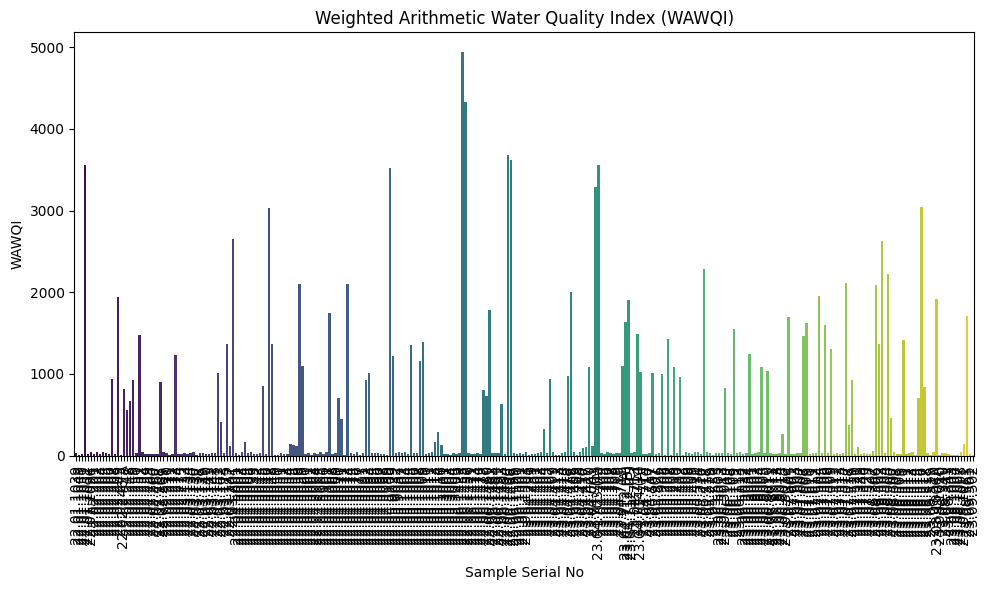

In [24]:

import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
sns.barplot(x = 'Sample Serial No', y = 'WAWQI', data = df, palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Weighted Arithmetic Water Quality Index (WAWQI)')
plt.ylabel('WAWQI')
plt.xlabel('Sample Serial No')
plt.tight_layout()
plt.show()

/tmp/ipykernel_37655/581573700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sample Serial No', y='WAWQI', data=top_samples, palette='coolwarm')


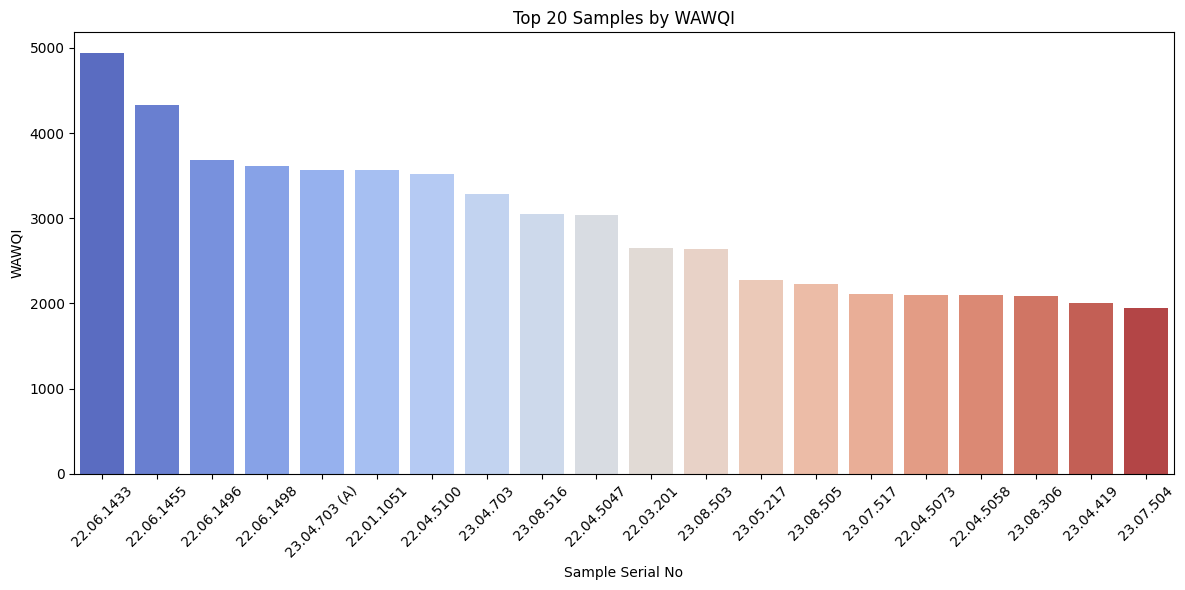

In [25]:
top_samples = df.sort_values('WAWQI', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='Sample Serial No', y='WAWQI', data=top_samples, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 20 Samples by WAWQI')
plt.tight_layout()
plt.show()


/tmp/ipykernel_37655/1870021487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sample Serial No', x='WAWQI', data=df, palette='viridis')


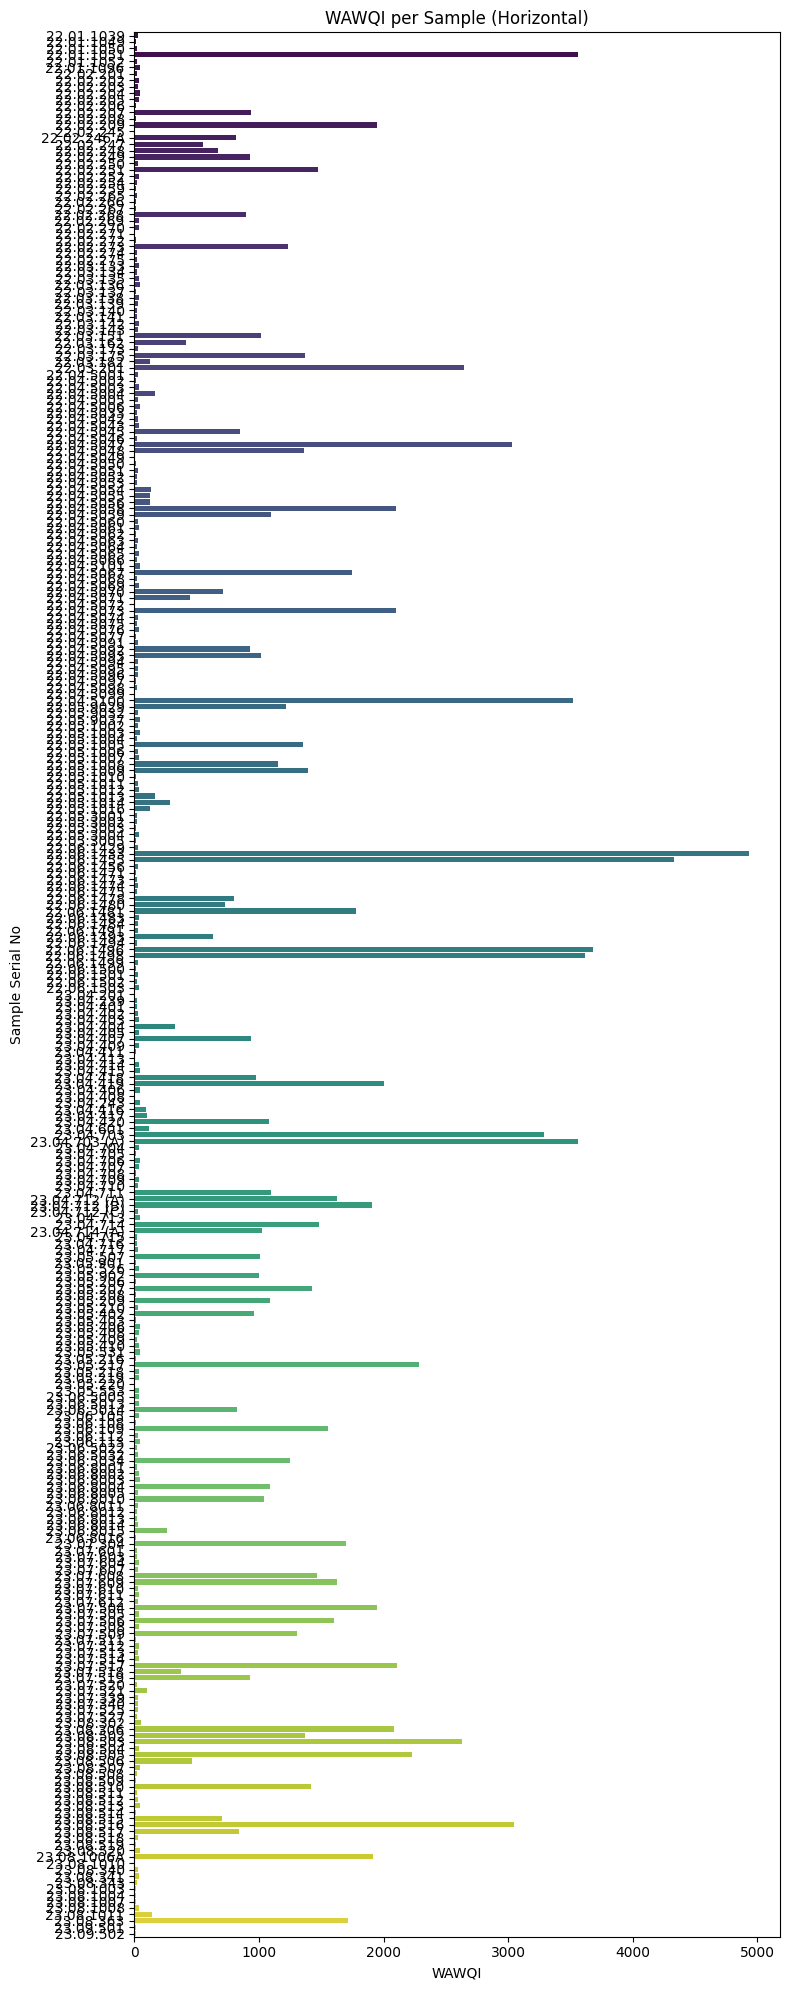

In [26]:

plt.figure(figsize=(8, 20))  # লম্বা করে
sns.barplot(y='Sample Serial No', x='WAWQI', data=df, palette='viridis')
plt.title('WAWQI per Sample (Horizontal)')
plt.xlabel('WAWQI')
plt.ylabel('Sample Serial No')
plt.tight_layout()
plt.show()


/tmp/ipykernel_37655/548559097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sample Serial No', y='WAWQI', data=df, palette='viridis')


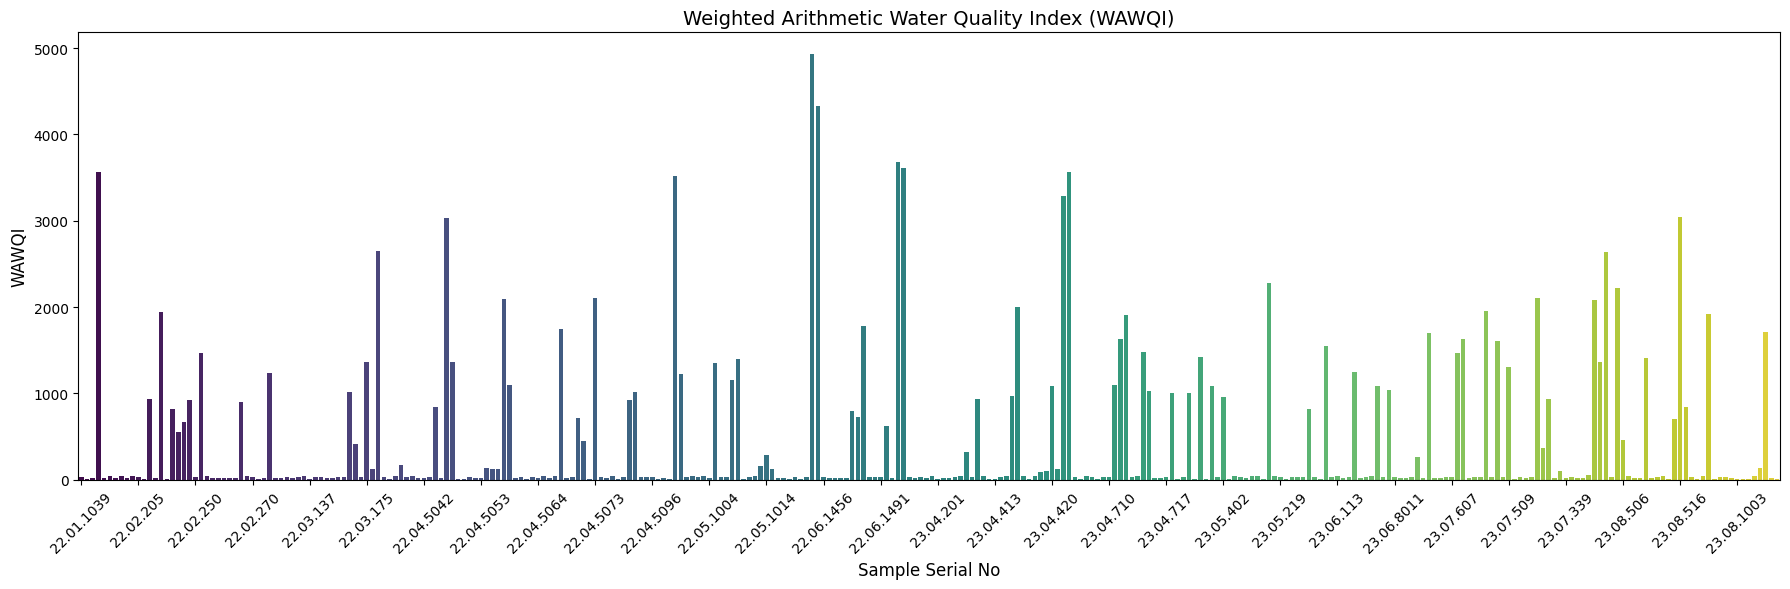

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))  # ✅ চওড়া figure, যাতে জায়গা বাড়ে
sns.barplot(x='Sample Serial No', y='WAWQI', data=df, palette='viridis')

# ✅ label ছোট করে দেখাও প্রতি 10টা করে একবার
xticks = plt.gca().get_xticks()
xtick_labels = df['Sample Serial No'].tolist()

plt.xticks(ticks=xticks[::10], labels=xtick_labels[::10], rotation=45)  # প্রতি 10টার মধ্যে ১টা

plt.title('Weighted Arithmetic Water Quality Index (WAWQI)', fontsize=14)
plt.ylabel('WAWQI', fontsize=12)
plt.xlabel('Sample Serial No', fontsize=12)
plt.tight_layout()
plt.show()


In [29]:
summary = df['Quality Status'].value_counts().reset_index()
summary.columns = ['Quality Status', 'Count']
summary_file = 'WAWQI_quality_summary.xlsx'
summary.to_excel(summary_file, index = False)
print('Summary saved to', summary_file)


Summary saved to WAWQI_quality_summary.xlsx
